# Use of kNN to Estimate Permeability 

Geolog has Facimage that is typically used to build probabilistic models to estimate other logs, facies or petrophysical properties. However, there are times where the user wants to use their personally developed software to make these predictions, and the addition of python in loglans makes this very easy to accomplish, totally transparent to the user and can be customized on the fly. Figure 1 below is an example where the details of our python version of kNN was first developed in Excel. Our goal is to apply the same techniques in Geolog, and we will be using python code in a Geolog loglan to accomplish this. 

  
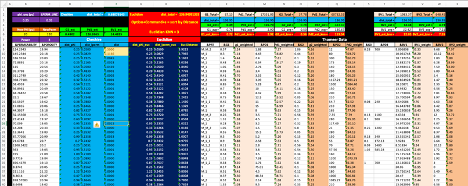
##### Figure 1 – Initial kNN coding developed in Excel and then transferred over to a Geolog python loglan

# IMPORTANT:  Input User Porosity and Permeability Data for Thomeer Parameter Estimates

In [1]:
Por = float(input('Input Porosity (fraction) = '))
Swt = float(input('Input Water Saturation (fraction) = '))

Input Porosity (fraction) = .2
Input Water Saturation (fraction) = .3


### Python kNN Code to Estimate Permeability:

In [4]:
#!/usr/bin/env python3
# python loglan
# When referencing Geolog variables in a Python script, names must always be lower case.

# Imports


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math


# =============================================================================
# # ===========================================================================
# # #-------------------------------------------------------------------------- 
# # #        Read in Reference data (_r) from csv file
# # #        Read in the reference NMR and Core data which has the Core Kair 
# # #        The Core data is only available for the upper half of well
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#read the Excel .xlsx file 
file = r'./data/co3_buckles.xlsx'
core_NMR_data = pd.read_excel(file,index_col=False)
core_NMR_data = core_NMR_data.replace(-999.25,np.nan)


Por_r = core_NMR_data['PHIT']
swt_r = core_NMR_data['SWT']
Kair_r = core_NMR_data['Permeability']
Porosity_r = core_NMR_data['Porosity']



# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #            Read in log data from Geolog
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
#Por = .2
#Swt = .2
por_min = 0
por_max = 0.4
n_neighbors = 5

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #
# # #            This is the beginnin of kNN for Permeability Estimations
# # #
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
    

permarray  = []
porarray   = []

inv_dist_array = []
distance_knn_array = []


#for k in range(0,len(NMR_data) ,1):  
por = ((Por -  por_min)/(por_max - por_min))
swt = Swt

dist_inv    = []
dist_phi    = []
dist_swt    = []
Perm_weight = []
Por_r_norm  = []
swt_r_norm = []

dist_inv_total = 0
Perm_total     = 0

#this is the reference_data being used with kNN
for i in range(0,len(core_NMR_data),1): 

    # Normalize the core reference data of Por_r and swt_r
    Por_r_norm.append((Por_r[i]   -  por_min)/(por_max - por_min))
    swt_r_norm.append((swt_r[i] -  0)/(1 - 0))
                          
    # Compute Euclidian Distance inverse distance
    dist_phi.append(abs(por - Por_r_norm[i]))
    dist_swt.append(abs(swt - swt_r_norm[i]))
    dist_inv.append(1/(math.sqrt(dist_phi[i]**2 + dist_swt[i]**2) + 0.0000001))

    # Calculalte inverse distance weights for perm
    Perm_weight.append(dist_inv[i]  * Kair_r[i])
    inv_dist_array.append(dist_inv[i]);  # add items

    # =============================================================================
    ###                    KNN Array for all data
    # # ===========================================================================
    # # #--------------------------------------------------------------------------
    distance_knn_array = [dist_inv, Perm_weight]
    #
    # # #--------------------------------------------------------------------------
    # # ===========================================================================
    # =============================================================================

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Transpose and Sort kNN array
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================

#knn_array = np.transpose array
knn_array = np.transpose(distance_knn_array)

#matsor x[x[:,column].argsort()[::-1]] and -1 us reverse order
mat_sort = knn_array[knn_array[:,0].argsort()[::-1]] #firt column reverse sort (-1)

# =============================================================================
# # ===========================================================================
# # #--------------------------------------------------------------------------
# # #           
# # #               Calculate knn Thomeer Parameters
# # #                   
# # #--------------------------------------------------------------------------
# # ===========================================================================
# =============================================================================
#------------------------------------------------------------------------------
#    Number of nearest Neighbors set in loglan constans
#------------------------------------------------------------------------------
#n_neighbors = 3
#------------------------------------------------------------------------------

dist_inv_total_knn = 0
Perm_total_knn = 0


#kNN Estimates for first n rows

for i in range(0,n_neighbors,1):
    dist_inv_total_knn = dist_inv_total_knn + mat_sort[i][0]
    Perm_total_knn  = Perm_total_knn + mat_sort[i][1]

#back to k values and calculate estimations now
perm_est_knn  = Perm_total_knn  / dist_inv_total_knn

if perm_est_knn < 0.001:
    perm_est_knn=0.001

print('Estimated Permeability =',perm_est_knn ,'mD')








Estimated Permeability = 41.92682104422412 mD
